<a href="https://colab.research.google.com/github/sunnyrai2003/Blinkit-Sales-Performance-Analysis/blob/main/Myntra_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### You are working as a data analyst in myntra company. You have to show stakeholders, performance of both brands and products listed on the platform.


In [1]:
!git clone "https://github.com/sakshisinghal936/myntra_analysis"

Cloning into 'myntra_analysis'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 22 (delta 6), reused 15 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 17.99 MiB | 15.10 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
import pandas as pd
df = pd.read_csv("/content/myntra_analysis/myntra_data.csv")
df.head(10)

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0
5,Floral Cotton Maxi Dress,Vishudh,4.1,800,4349,1826,"S,M,L,XL,XXL",dresses/vishudh/vishudh-rust-brown-floral-prin...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",dresses,vishudh,2523,58
6,Fitted Crop Top,Tokyo Talkies,4.4,210,499,249,"S,M,L,XL",tops/tokyo-talkies/tokyo-talkies-pink-fitted-c...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tops,tokyo-talkies,250,50
7,Men Mesh Running Shoes,Woakers,3.4,591,3125,687,"UK6,UK7,UK8,UK9,UK10",sports-shoes/woakers/woakers-men-white--orange...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",sports-shoes,woakers,2438,78
8,Men Checked Pullover,Roadster,4.3,528,1999,999,"S,M,L,XL",sweaters/roadster/the-roadster-lifestyle-co-me...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",sweaters,roadster,1000,50
9,Girls Cotton Jersey Top,H&M,4.2,16,599,599,"8-10Y,10-12Y,12-14Y,14-15Y",tops/hm/hm-girls-pink-cotton-jersey-top/169299...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tops,hm,0,0


In [3]:
df["product_link"][2]

'kurtas/biba/biba-women-off-white--black-printed-pure-cotton-a-line-kurta/13446092/buy'

### Data Cleaning

1. Remove null values.
2. Remove duplicates.
3. Extract Product id from product link. On the basis we will decide distinct products.
4. Remove columns which are not required.
5. Rearrange columns.
6. Check discount amount and discount_percent calculation.
7. Check outliers (max and min values) for all numerical columns.

In [4]:
df.shape

(168029, 13)

In [5]:
df.isnull().sum()

,0
product_name,0
brand_name,0
rating,0
rating_count,0
marked_price,0
discounted_price,0
sizes,0
product_link,0
img_link,0
product_tag,0


In [6]:
df.duplicated().sum()

21418

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(146611, 13)

In [9]:
df["product_link"][0]

'wallets/lino-perros/lino-perros-women-peach-coloured-croc-textured-two-fold-wallet/18070682/buy'

In [10]:
df["product_id"] = df["product_link"].str.split("/").str[3]
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent,product_id
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36,18070682
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55,12548958
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20,13446092
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10,18017006
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0,18015232


In [11]:
df["product_link"].duplicated().sum()

173

In [12]:
df.drop(columns = ["sizes","product_link"	,"img_link","brand_tag"], inplace = True)

In [13]:
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,product_tag,discount_amount,discount_percent,product_id
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,wallets,467,36,18070682
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,flip-flops,715,55,12548958
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,kurtas,400,20,13446092
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,tshirts,60,10,18017006
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,kurta-sets,0,0,18015232


In [14]:
df = df[["product_id", "product_name", "product_tag", "brand_name", "rating", "rating_count", "marked_price",	"discounted_price","discount_amount"	,"discount_percent"  ]]
df.head()

,product_id,product_name,product_tag,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent
0,18070682,Croc Textured Two Fold Wallet,wallets,Lino Perros,0.0,0,1295,828,467,36
1,12548958,Men Striped Sliders,flip-flops,Mast & Harbour,4.0,76,1299,584,715,55
2,13446092,Printed A-line Kurta,kurtas,Biba,4.3,66,1999,1599,400,20
3,18017006,Girls Floral Printed T-shirt,tshirts,Anthrilo,0.0,0,599,539,60,10
4,18015232,Women Printed Kurta with Skirt,kurta-sets,FASHION DWAR,0.0,0,2899,2899,0,0


In [15]:
df["discount_amount_nw"] = df["marked_price"]-	df["discounted_price"]
df[df["discount_amount_nw"] !=df["discount_amount"]]

,product_id,product_name,product_tag,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent,discount_amount_nw


In [16]:
df.drop(["discount_amount_nw"], axis =1, inplace = True)

In [17]:
df.describe()

,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent
count,146611.000000,146611.000000,146611.000000,146611.000000,146611.000000,146611.000000
mean,2.317154,123.589219,2525.860379,1532.622675,993.237704,37.147765
std,2.097438,817.995615,2437.720930,1842.427134,1235.525991,24.594289
min,0.000000,0.000000,50.000000,49.000000,0.000000,0.000000
25%,0.000000,0.000000,1299.000000,679.000000,210.000000,15.000000
50%,3.600000,6.000000,1999.000000,1012.000000,702.000000,40.000000
75%,4.300000,34.000000,2999.000000,1749.000000,1317.000000,59.000000
max,5.000000,55900.000000,113999.000000,45900.000000,68400.000000,91.000000


In [18]:
df.head()

,product_id,product_name,product_tag,brand_name,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent
0,18070682,Croc Textured Two Fold Wallet,wallets,Lino Perros,0.0,0,1295,828,467,36
1,12548958,Men Striped Sliders,flip-flops,Mast & Harbour,4.0,76,1299,584,715,55
2,13446092,Printed A-line Kurta,kurtas,Biba,4.3,66,1999,1599,400,20
3,18017006,Girls Floral Printed T-shirt,tshirts,Anthrilo,0.0,0,599,539,60,10
4,18015232,Women Printed Kurta with Skirt,kurta-sets,FASHION DWAR,0.0,0,2899,2899,0,0


Analysis
Brand
1. Number of brands listed on the platform.
2. Average brand rating.
3. Number of products a particular brand is selling. Does it impact the rating_count??
4. Relation between discount_percent and rating_count for a brand.
5. Which brand has maximum revenue and minimum revenue. (Top 5 brands and bottom 5 brands)
6. Relation between average_rating and discounted_percent.
7. Histogram for discount_percent.



Product
1.



##### Which brand is giving max discount on a particular type of product.

In [19]:
no_of_brand=df['brand_name'].nunique()
no_of_brand

3194

In [23]:
name_pf_brand=df['brand_name'].unique()

In [22]:
df['brand_name'].value_counts().head(10)

,count
brand_name,
Roadster,4557
Mast & Harbour,2398
DressBerry,2077
H&M,1998
Anouk,1785
max,1773
HRX by Hrithik Roshan,1746
Puma,1668
MANGO,1626


In [48]:
brand_discount_vs_ratingcount=df.groupby('brand_name').agg(avg_discount_percent=('discount_percent','mean'),rating_count=('rating_count','sum'))

In [49]:
brand_discount_vs_ratingcount

,avg_discount_percent,rating_count
brand_name,,
1 Stop Fashion,75.000000,2
1st Step,10.000000,0
20Dresses,26.138952,14068
39 THREADS,40.000000,7
3PIN,43.000000,6
...,...,...
x2o,72.111111,3879
yelloe,57.478261,4098
yoho,28.857143,0


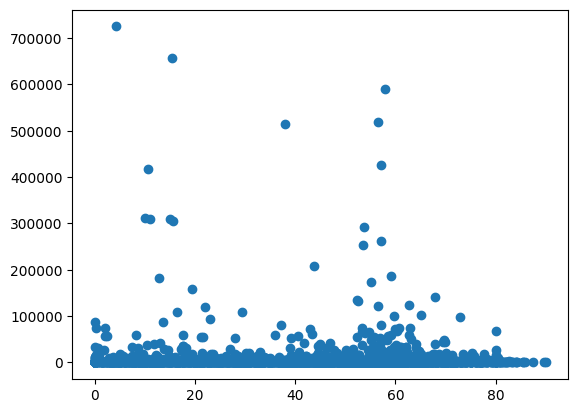

In [50]:
import matplotlib.pyplot as plt
plt.scatter(brand_discount_vs_ratingcount['avg_discount_percent'].drop('Roadster'),brand_discount_vs_ratingcount['rating_count'].drop('Roadster'))

In [51]:
df['revenu']=df['discounted_price']*df['rating_count'].head(10)
df.groupby('brand_name')['revenu'].sum().sort_values(ascending=False).head(10)

,revenu
brand_name,
Vishudh,1460800.0
Roadster,527472.0
Woakers,406017.0
Biba,105534.0
Tokyo Talkies,52290.0
Mast & Harbour,44384.0
H&M,9584.0
1 Stop Fashion,0.0
Proline,0.0


In [52]:
# df.head(10)

(array([594., 300., 307., 282., 306., 427., 458., 348., 149.,  23.]),
 array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90.]),
 <BarContainer object of 10 artists>)

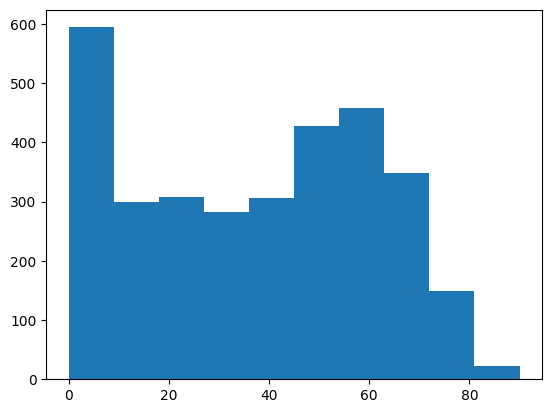

In [54]:
plt.hist(brand_discount_vs_ratingcount['avg_discount_percent'])

(array([3.178e+03, 8.000e+00, 5.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([      0. ,  201651.8,  403303.6,  604955.4,  806607.2, 1008259. ,
        1209910.8, 1411562.6, 1613214.4, 1814866.2, 2016518. ]),
 <BarContainer object of 10 artists>)

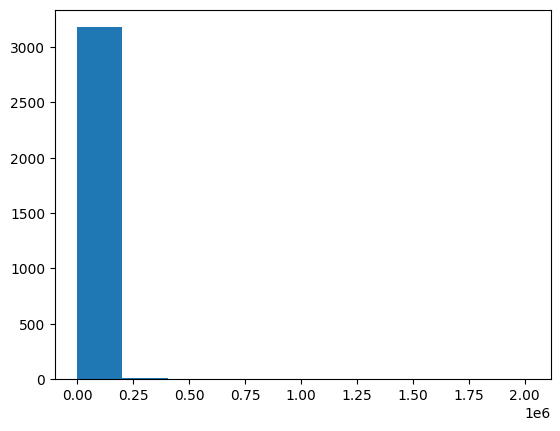

In [55]:
plt.hist(brand_discount_vs_ratingcount['rating_count'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e651a56f010>,
 'caps': [<matplotlib.lines.Line2D at 0x7e651a56ce10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e651a593a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7e651a7b86d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e651a7b9fd0>],
 'means': []}

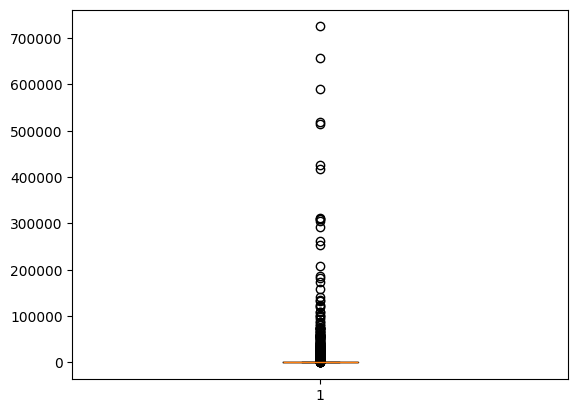

In [57]:
plt.boxplot(brand_discount_vs_ratingcount['rating_count'].drop('Roadster'))